# SVMs for Binary Classification

1. **Binary Classification**: In many situations, we want our machine learning algorithm to predict one of two outcomes. For example, sorting emails into personal or junk mail, or classifying objects in space as galaxies, stars, or planets. This type of problem is called binary classification because there are only two possible outcomes.

2. **Representation of Labels**: In binary classification, we denote the two possible outcomes as {+1, -1}. For instance, in cancer detection, a patient with cancer might be labeled as +1. However, any two distinct values can be used, like {True, False} or {0, 1}.

3. **Support Vector Machines (SVMs)**: SVM is a popular approach for solving binary classification tasks. It works by finding the best way to separate the data points into two classes using a linear or nonlinear boundary.

4. **Learning with SVMs**: Like other machine learning tasks, we have a set of examples (data points) along with their corresponding labels. We use this training data to estimate parameters of the SVM model that minimize classification errors. SVM provides advanced results in many applications and is backed by strong theoretical guarantees.

5. **Geometric Interpretation**: Unlike some other approaches that use probabilistic models, SVMs offer a geometric way to think about machine learning. It relies on concepts like inner products and projections to find the optimal decision boundary that separates the classes.

6. **Optimization**: The process of training an SVM involves solving an optimization problem. We aim to minimize a certain function that captures the classification error on the training data. However, unlike some other problems, the optimization problem for SVMs doesn't have an analytical solution, so we need to use various optimization techniques.

7. **Formalization of SVM**: SVMs can be formalized in different ways. One way is through the concept of a margin, which represents the separation between classes. Another way is through a loss function, which quantifies the classification error. Additionally, we can derive a dual version of SVM using Lagrange multipliers, which provides yet another perspective on the problem.

8. **Kernels**: SVMs can also handle nonlinear boundaries using kernel functions. These functions allow SVMs to operate in higher-dimensional spaces, making it possible to find more complex decision boundaries.

In summary, SVMs provide a powerful framework for solving binary classification problems by finding optimal decision boundaries in the data space, either linear or nonlinear, through geometric reasoning and optimization techniques.

# Separating Hyperplanes

### Introduction:
- **Goal**: In classification tasks, we want to separate different classes of data points using a straight line (or hyperplane).
- **Representation**: Each data point is represented as a vector, and we can measure their similarity using inner products (dot products), which are related to angles between vectors.
  
### Separating with Hyperplanes:
- **Partitioning Space**: Imagine our data space is like a big field, and we want to divide it into regions for each class. For binary classification, we divide it into two parts: one for positive examples and one for negative examples.
- **Hyperplane**: Think of a hyperplane as a flat wall slicing through this field. It's like drawing a line through the field that separates the two classes.
- **Equation of Hyperplane**: Mathematically, we represent this hyperplane using an equation: $ f(\mathbf{x}) = \langle \mathbf{w}, \mathbf{x} \rangle + b = 0 $, where $ \mathbf{w} $ is a vector normal to the hyperplane and $ b $ is a bias term.

### Understanding the Hyperplane:
- **Orthogonality**: The vector $ \mathbf{w} $ is perpendicular (orthogonal) to the hyperplane. This means it points straight out from the surface.
- **Direction**: The orientation of $ \mathbf{w} $ determines the direction of the hyperplane.
- **Positive and Negative Sides**: The hyperplane divides the space into two sides: one for positive examples and one for negative examples.

### Classifying Examples:
- **Test Example**: When we have a new data point, we check which side of the hyperplane it falls on.
- **Classification Rule**: If $ f(\mathbf{x}_{\text{test}}) \geq 0 $, we classify it as positive; otherwise, we classify it as negative.
- **Geometric Interpretation**: Positive examples are "above" the hyperplane, and negative examples are "below" it.

### Training the Classifier:
- **Ensuring Correct Placement**: During training, we adjust $ \mathbf{w} $ and $ b $ to make sure positive examples are on the positive side of the hyperplane, and negative examples are on the negative side.
- **Condition for Placement**: We want $ \langle \mathbf{w}, \mathbf{x}_n \rangle + b \geq 0 $ for positive examples ($ y_n = +1 $), and $ \langle \mathbf{w}, \mathbf{x}_n \rangle + b < 0 $ for negative examples ($ y_n = -1 $).

### Visual Explanation:

Imagine you have a set of data points in a two-dimensional space, where each point belongs to one of two classes: orange crosses and blue discs. Now, you want to draw a line (hyperplane) that separates these two classes as best as possible.

Here's how it works visually:
- You draw a straight line (our hyperplane) through the space.
- Ideally, you want this line to be placed so that all orange crosses are on one side and all blue discs are on the other side.
- The line's position is determined by its orientation (defined by a normal vector $ \mathbf{w} $) and its location (defined by a bias term $ b $).
- The normal vector $ \mathbf{w} $ is perpendicular (orthogonal) to the line and determines its orientation.
- The bias term $ b $ determines the offset of the line from the origin.
- By adjusting $ \mathbf{w} $ and $ b $, you can move the line around until it effectively separates the two classes.

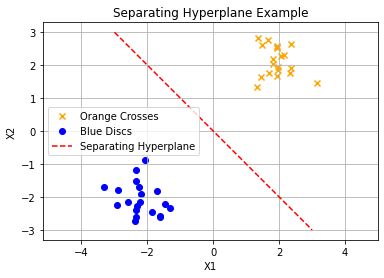

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points for orange crosses
orange_crosses = np.random.randn(20, 2) * 0.5 + [2, 2]

# Generate random data points for blue discs
blue_discs = np.random.randn(20, 2) * 0.5 + [-2, -2]

# Plot the data points
plt.scatter(orange_crosses[:, 0], orange_crosses[:, 1], color='orange', marker='x', label='Orange Crosses')
plt.scatter(blue_discs[:, 0], blue_discs[:, 1], color='blue', marker='o', label='Blue Discs')

# Plot the separating hyperplane
x = np.linspace(-3, 3, 100)
y = -x  # w1*x1 + w2*x2 = 0 -> x2 = -w1/w2 * x1
plt.plot(x, y, color='red', linestyle='--', label='Separating Hyperplane')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Separating Hyperplane Example')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

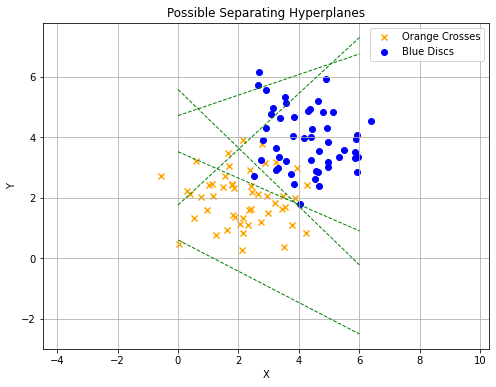

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points for orange crosses
np.random.seed(0)
orange_crosses_x = np.random.normal(loc=2, scale=1, size=50)
orange_crosses_y = np.random.normal(loc=2, scale=1, size=50)

# Generate random data points for blue discs
blue_discs_x = np.random.normal(loc=4, scale=1, size=50)
blue_discs_y = np.random.normal(loc=4, scale=1, size=50)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(orange_crosses_x, orange_crosses_y, color='orange', marker='x', label='Orange Crosses')
plt.scatter(blue_discs_x, blue_discs_y, color='blue', marker='o', label='Blue Discs')

# Generate a range of x values for the decision boundary
x_values = np.linspace(0, 6, 100)

# Plot multiple separating hyperplanes (green lines)
for i in range(5):
    # Generate random slope and intercept for the hyperplane
    slope = np.random.uniform(-1, 1)
    intercept = np.random.uniform(0, 6)
    
    # Calculate corresponding y values for the hyperplane
    y_values = slope * x_values + intercept
    
    # Plot the hyperplane
    plt.plot(x_values, y_values, color='green', linestyle='--', linewidth=1)

plt.title('Possible Separating Hyperplanes')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
